# Data pre-processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris =  pd.read_csv("/home/yatin/Downloads/IRIS.csv")
iris = iris.sample(frac=1).reset_index(drop=True) # Shuffle

In [3]:
iris.shape

(150, 5)

In [4]:
X = iris[["sepal_length","sepal_width","petal_length","petal_width"]]
X = np.array(X)
X.shape

(150, 4)

In [5]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

Y = iris.species
# print(Y)
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
Y[0:5]
print(Y.shape)

(150, 3)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
X_train=X_train.T
Y_train=Y_train.T
X_test=X_test.T
Y_test=Y_test.T
print("X_train.shape",X_train.shape,"\nY_train.shape",Y_train.shape,"\nX_test",X_test.shape,"\nY_test",Y_test.shape)

X_train.shape (4, 120) 
Y_train.shape (3, 120) 
X_test (4, 30) 
Y_test (3, 30)


# Functions 

In [7]:
def initialize_parameters(layers_dims, print_shapes = False):
    
    L = len(layers_dims)
    parameters ={}
    
    for i in range(1,L) :
        parameters['W'+ str(i)] = np.random.rand(layers_dims[i],layers_dims[i-1])*0.01
        parameters['b'+ str(i)] = np.zeros((layers_dims[i],1))
        
    if print_shapes :
        initialize_parameters_print_shapes(parameters)
#     if print_all:
#         initialize_parameters_print_all(parameters)

    return parameters        

In [8]:
def initialize_parameters_print_shapes(parameters):
    print('initialised:\n')
    for i in range(1,L):
        print('\nW'+ str(i),parameters['W'+ str(i)].shape)
        print('\nb'+ str(i),parameters['b'+ str(i)].shape)
    print('--------------------------------------------')

# def initialize_parameters_print_all(parameters):
#     print('initialised:\n')
#     for i in range(1,L):
# #         print(parameters['W1'])
#         print('W'+ str(i),parameters['W'+ str(i)])
#         print('b'+ str(i),parameters['b'+ str(i)])
#     print('--------------------------------------------')

$\Large S(y_i) = \frac {e^{y_i}}{\sum_{j=1}^{i} y_j}$

In [9]:
# def relu(Z):
#     A = np.maximum(Z,0,Z)
#     return A

def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
#     print(e_x)
    return e_x / e_x.sum()

# def softmax(x):
#     return np.exp(x) / np.sum(np.exp(x), axis=0)

# scores = [3.0, 1.60, 0.0]
# print(softmax(scores))
# print(softmax2(scores))

In [10]:
def forward_propogation(X,parameters,layers_dims,print_para = False):
    
    L = len(layers_dims)
    A_prev = X
    
    for i in range(1,L-1): # 1st hidden layer to last hidden layer
        parameters ['Z'+ str(i)] = np.dot(parameters ['W'+ str(i)],A_prev) + parameters ['b'+ str(i)]
        parameters ['A'+ str(i)] = sigmoid(parameters ['Z'+ str(i)])
        A_prev = parameters ['A'+ str(i)]
    # for the output layer we will use softmax
    parameters ['Z'+ str(i+1)] = np.dot(parameters ['W'+ str(i+1)],A_prev) + parameters ['b'+ str(i+1)]
    parameters ['AL'] = softmax(parameters ['Z'+ str(i+1)])
#     parameters ['AL'] = parameters.pop('A4') 
    
    if print_para:
        forward_propogation_print_shapes()
            
    return parameters ['AL'] ,parameters

In [11]:
def forward_propogation_print_shapes():
    print('F_propogated:\n')
    for i in range(1,L):
        print('\n','Z'+str(i),parameters['Z'+str(i)].shape)
        print('\n','W'+str(i),parameters['W'+str(i)].shape)
        print('\n','b'+str(i),parameters['b'+str(i)].shape)
    print('\n','AL',parameters['AL'].shape)
    print('--------------------------------------------')

In [12]:
layers_dims = [3,5,4,2,1]
L = len(layers_dims)
parameters = initialize_parameters(layers_dims, print_shapes = True )
X = np.random.rand(3,40)
AL,parameters = forward_propogation(X,parameters,layers_dims,L)
print(parameters)

initialised:


W1 (5, 3)

b1 (5, 1)

W2 (4, 5)

b2 (4, 1)

W3 (2, 4)

b3 (2, 1)

W4 (1, 2)

b4 (1, 1)
--------------------------------------------
F_propogated:


 Z1 (5, 40)

 W1 (5, 3)

 b1 (5, 1)

 Z2 (4, 40)

 W2 (4, 5)

 b2 (4, 1)

 Z3 (2, 40)

 W3 (2, 4)

 b3 (2, 1)

 Z4 (1, 40)

 W4 (1, 2)

 b4 (1, 1)

 AL (1, 40)
--------------------------------------------
{'W1': array([[0.00034878, 0.00510372, 0.00703926],
       [0.00778153, 0.00914418, 0.00604234],
       [0.00631437, 0.00867913, 0.00333925],
       [0.00776167, 0.00644953, 0.00234977],
       [0.00721444, 0.00894101, 0.00889146]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[0.00803508, 0.00433229, 0.0005106 , 0.00437116, 0.00961894],
       [0.00762857, 0.00580332, 0.00552627, 0.00012769, 0.0077222 ],
       [0.00127722, 0.00527965, 0.00167553, 0.00027758, 0.00311945],
       [0.00350425, 0.00257669, 0.00380403, 0.00600102, 0.00796784]]), 'b2': array([[0.],
       [0.],
       [0

$\large Cost = -\frac{1}{m}\sum_{i=1}^m(y\times log(h(x))+(1-y)\times log(1-h(x)))$

In [32]:
def compute_cost(Y,AL):
    e=1e-5
    m = Y.shape[1]
    cost = (-1/m)*np.sum(np.multiply(Y,np.log(AL+e),np.multiply(1-Y,np.log(1-AL+e))))
    return(cost)

In [14]:
# Y = np.random.rand(2,2)
# AL = np.random.rand(2,2)
# cost=compute_cost(Y,AL)
# print(cost)

$\delta Z = (\frac{-Y}{AL} - \frac{1-Y}{1-AL})\times\sigma\prime(Z)  =  \delta A\times\sigma\prime(Z) $

In [20]:
def softmax_backwards(cache):
    return softmax(cache)*(1-softmax(cache))

def sigmoid_backwards(cache):
    return sigmoid(cache)*(1-sigmoid(cache))

def tanh_backwards(Z):
    return 1 - np.tanh(Z)**2


$\large\delta A^{[l]} = (\frac{-Y}{AL} - \frac{1-Y}{1-AL})$

$\large\delta Z^{[l]} =  \delta A\times\sigma\prime(Z) $

$\large\delta W^{[l]} =  \frac {1}{m}\delta Z . A^{[l-1]T}$

$\large\delta b^{[l]} = \frac {1}{m}\sum _{i=1}^{m}\delta Z$

$\large\delta A^{[l-1]} = W^{[l]T} . dZ^{[l]}$

In [16]:
def backpropogation(layers_dims,parameters,AL,Y,X,print_shapes = False):
    caches = {}
    m = Y.shape[1]
    L = len(layers_dims)
    flag = True
    parameters['A' + str(0)] = X
    for l in reversed(range(1,L)):
        
        if (flag) :   
            caches['dAL'] = np.divide(-Y,AL)-np.divide(1-Y,1-AL)                               
            caches['dZ'+ str(l)] = caches['dAL']*sigmoid_backwards(parameters['Z'+ str(l)])    
            caches['dW'+ str(l)] = (1/m)*np.dot(caches['dZ'+ str(l)],parameters['A' + str(l-1)].T)          
            caches['db'+ str(l)] = (1/m)*np.sum(caches['dZ'+ str(l)],axis=1,keepdims=True)     
            caches['dA' + str(l-1)] = np.dot(parameters['W'+ str(l)].T,caches['dZ' + str(l)])
            flag = False
        else:
            caches['dZ'+ str(l)] = caches['dA' + str(l)]*softmax_backwards(parameters['Z'+ str(l)])
            caches['dW'+ str(l)] = (1/m)*np.dot(caches['dZ'+ str(l)],parameters['A' + str(l-1)].T)
            caches['db'+ str(l)] = (1/m)*np.sum(caches['dZ'+ str(l)],axis=1,keepdims=True)
            if (l-1 != 0) :
                caches['dA' + str(l-1)] = np.dot(parameters['W' + str(l)].T,caches['dZ' + str(l)]) 
                
    if print_shapes :
        backpropogation_print_shapes(caches)
    
    return caches

In [17]:
def backpropogation_print_shapes(caches):
    print('B_propogated:\n')
    print ('dAL',caches['dAL'].shape)
    for l in range(1,L):
        print("dZ"+ str(l),caches['dZ'+ str(l)].shape)
        print("dW"+ str(l),caches['dW'+ str(l)].shape)
        print("db"+ str(l),caches['db'+ str(l)].shape)
        if (l-1 != 0) :
            print('dA' + str(l-1),caches['dA' + str(l-1)].shape)
    print('--------------------------------------------')

In [18]:
layers_dims = [3,5,4,2,1]
L = len(layers_dims)

In [22]:
layers_dims = [3,5,4,2,2]
L = len(layers_dims)
parameters = initialize_parameters(layers_dims,print_shapes=True)
X = np.random.rand(3,140)
Y = np.random.rand(1,140)
AL,cache = forward_propogation(X,parameters,layers_dims,print_para = True)
# forward_propogation_print_shapes()
caches = backpropogation(layers_dims,cache,AL,Y,X,print_shapes=True)
# print(caches)

initialised:


W1 (5, 3)

b1 (5, 1)

W2 (4, 5)

b2 (4, 1)

W3 (2, 4)

b3 (2, 1)

W4 (2, 2)

b4 (2, 1)
--------------------------------------------
F_propogated:


 Z1 (5, 140)

 W1 (5, 3)

 b1 (5, 1)

 Z2 (4, 140)

 W2 (4, 5)

 b2 (4, 1)

 Z3 (2, 140)

 W3 (2, 4)

 b3 (2, 1)

 Z4 (2, 140)

 W4 (2, 2)

 b4 (2, 1)

 AL (2, 140)
--------------------------------------------
B_propogated:

dAL (2, 140)
dZ1 (5, 140)
dW1 (5, 3)
db1 (5, 1)
dZ2 (4, 140)
dW2 (4, 5)
db2 (4, 1)
dA1 (5, 140)
dZ3 (2, 140)
dW3 (2, 4)
db3 (2, 1)
dA2 (4, 140)
dZ4 (2, 140)
dW4 (2, 2)
db4 (2, 1)
dA3 (2, 140)
--------------------------------------------


$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

In [23]:
def update_parameters(parameters,caches,alpha,L):
    for l in range(L-1):
        parameters['W'+ str(l+1)] = parameters['W'+ str(l+1)] - alpha * caches['dW'+ str(l+1)]
        parameters['b'+ str(l+1)] = parameters['b'+ str(l+1)] - alpha * caches['db'+ str(l+1)]
    return parameters

In [24]:
cache_updated = update_parameters(cache,caches,0.01,L)
# print(cache_updated)

In [34]:
def predict(X, Y, parameters,layers_dims):
    m = X.shape[1]
    n = len(layers_dims)  
#     p = np.zeros(Y.shape)
    AL, caches = forward_propogation(X, parameters,layers_dims)
    
#     _max = AL[0][0]  
#     for i in range(0, AL.shape[1]):
#         for j in range(0,AL.shape[0]):
#             if (AL[i][j] > _max):
#                 p, _max = j,AL[i][j]
#         for k in range(0,AL.shape[0]):   
#             if (k == p) :
#                 AL[i][k] = 1
#             else :
#                 AL[i][k] = 0
    print(AL)
    for i in range(AL.shape[1]):
        _max = AL[:,i].argmax()
        AL[_max,i] = 1
        for j in range(AL.shape[0]):
            if AL[j,i] != 1 :
                AL[j,i] = 0
            
    print("Accuracy: "  + str(np.sum((AL == Y)/m)*100))
        
    return AL

In [26]:
def nn( X, Y, layers_dims, iterations,alpha, print_cost= False):
    parameters = initialize_parameters(layers_dims, print_shapes = False)
    costs = []
    for i in range(1,iterations):
        
        AL ,caches = forward_propogation(X,parameters,layers_dims)
        cost = compute_cost(Y,AL)
        caches = backpropogation(layers_dims,parameters,AL,Y,X,print_shapes = False)
        parameters = update_parameters(parameters,caches,alpha,len(layers_dims))
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        costs.append(cost)
                  
    p = predict(X, Y, parameters,layers_dims)
    return p,costs

# Training and Testing the nn

Cost after iteration 100: 5.881883
Cost after iteration 200: 5.881885
Cost after iteration 300: 5.881886
Cost after iteration 400: 5.881886
Cost after iteration 500: 5.881887
Cost after iteration 600: 5.881887
Cost after iteration 700: 5.881887
Cost after iteration 800: 5.881887
Cost after iteration 900: 5.881887
Cost after iteration 1000: 5.881887
Cost after iteration 1100: 5.881887
Cost after iteration 1200: 5.881887
Cost after iteration 1300: 5.881887
Cost after iteration 1400: 5.881887
Cost after iteration 1500: 5.881887
Cost after iteration 1600: 5.881887
Cost after iteration 1700: 5.881887
Cost after iteration 1800: 5.881887
Cost after iteration 1900: 5.881887
Cost after iteration 2000: 5.881887
Cost after iteration 2100: 5.881887
Cost after iteration 2200: 5.881887
Cost after iteration 2300: 5.881887
Cost after iteration 2400: 5.881887
Cost after iteration 2500: 5.881887
Cost after iteration 2600: 5.881887
Cost after iteration 2700: 5.881887
Cost after iteration 2800: 5.881887
C

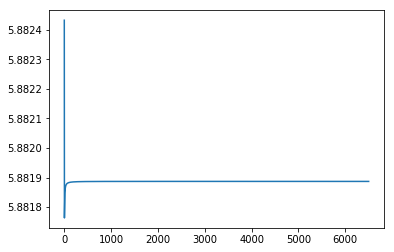

In [35]:
itera,alpha = 6500,0.01
layers_dims = [X_train.shape[0],5,4,2,Y_train.shape[0]]
p,costs = nn( X_train, Y_train, layers_dims,itera,alpha, print_cost= True)
# print(p)

import seaborn as sns
# print(costs)
sns.lineplot(x= np.arange(1,itera),y =costs)